In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
city_csv_path = os.path.join("Resources","city_data.csv")
city_df = pd.read_csv(city_csv_path)

ride_csv_path = os.path.join("Resources","ride_data.csv")
ride_df = pd.read_csv(ride_csv_path)

In [8]:
city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [25]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [28]:
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [31]:
sum(city_df['type'] == "Rural")

18

In [22]:
ride_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2370    False
2371    False
2372    False
2373    False
2374    False
Length: 2375, dtype: bool

In [13]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [32]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [33]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [35]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [39]:
pyber_data_df.duplicated().sum()

0

<AxesSubplot:>

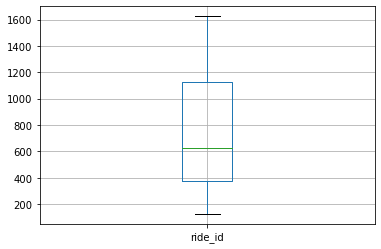

In [47]:
total_ride_count_df = pyber_data_df.groupby(["type"])[["ride_id"]].count()
total_ride_count_df
total_ride_count_df.boxplot(column=['ride_id']) 
plt.

<AxesSubplot:>

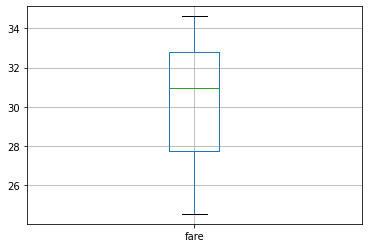

In [48]:
fare_df = pyber_data_df.groupby(["type"])[["fare"]].mean()
fare_df.boxplot(column=['fare'])

<AxesSubplot:>

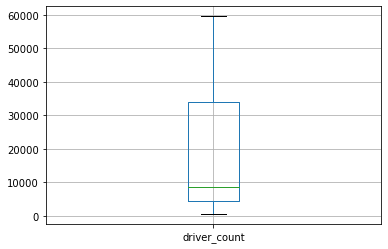

In [49]:
driver_df = pyber_data_df.groupby(["type"])[["driver_count"]].sum()
driver_df.boxplot(column=["driver_count"])

<AxesSubplot:ylabel='ride_id'>

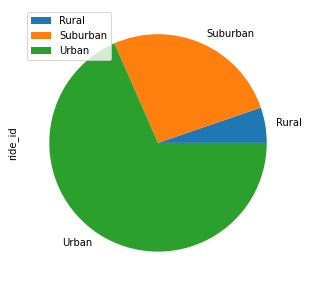

In [54]:
ride_df = pyber_data_df.groupby(["type"])[["ride_id"]].count()
ride_df.plot.pie(y='ride_id', figsize=(5, 5))

<AxesSubplot:ylabel='fare'>

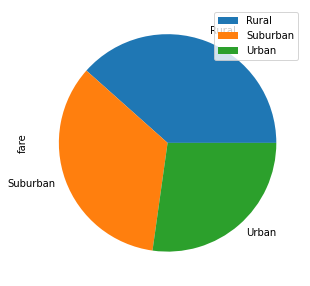

In [55]:
fare_df = pyber_data_df.groupby(["type"])[["fare"]].mean()
fare_df.plot.pie(y='fare', figsize=(5,5))

<AxesSubplot:ylabel='driver_count'>

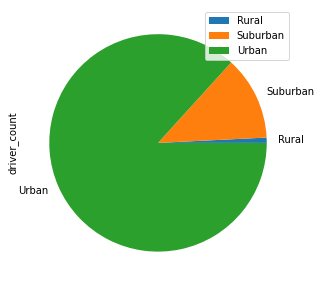

In [56]:
driver_df = pyber_data_df.groupby(["type"])[["driver_count"]].sum()
driver_df.plot.pie(y="driver_count", figsize=(5,5))

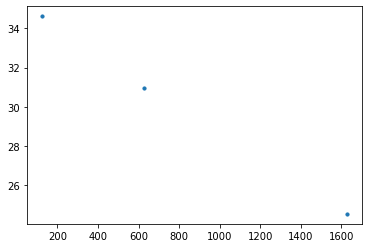

In [59]:
plt.scatter(ride_df,, s=10)